# Deep learning for timeseries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## AE-forecasting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/all_monotonic_dogbone_force.xlsx')

In [ ]:
df_test3 = pd.read_csv('/content/test3_DIC+Frame.csv')

In [ ]:
df_test3_1=df_test3.dropna()

In [ ]:
df_test3_1

,Time,Force,Stroke,Strain,stress,Tstress,Tstrain,Stroke from DIC (mm)
0,0.0,0.143051,0.000600,0.000004,0.000645,0.000645,-1.370000e-17,0.000000
1,0.2,0.333786,0.003962,0.000026,0.001504,0.001504,-5.560000e-05,-0.004853
2,0.4,0.890096,0.007306,0.000049,0.004012,0.004012,-3.200000e-05,-0.002108
3,0.6,8.964539,0.010644,0.000071,0.040404,0.040406,-2.390000e-05,-0.003308
4,0.8,9.679794,0.013975,0.000093,0.043627,0.043631,-6.060000e-05,-0.003027
...,...,...,...,...,...,...,...,...
4290,858.0,-56.489310,14.300640,0.095338,-0.254600,-0.278873,9.905970e-02,7.190910
4291,858.2,-56.409840,14.303990,0.095360,-0.254242,-0.278486,9.908110e-02,7.188380
4292,858.4,-56.123730,14.307320,0.095383,-0.252952,-0.277079,9.911960e-02,7.189470
4293,858.6,-55.964790,14.310640,0.095405,-0.252236,-0.276300,9.915360e-02,7.188970


In [ ]:
df

,Force
0,1127.513
1,1127.513
2,2352.635
3,3427.315
4,4408.630
...,...
5476,68685.900
5477,68685.900
5478,68685.900
5479,68685.900


In [ ]:
df_test3_2=df_test3_1[['Force','Time']]

In [ ]:
df3=df[['Force','Time']]

In [ ]:
df4=df3.dropna()

In [ ]:
df1=df[['amplitude','duration','rms','rise_time','counts','Force']]

In [ ]:
df1

,amplitude,duration,rms,rise_time,counts,Force
0,0.000233,2.718000e-04,0.000064,2.700000e-06,18,1127.513
1,0.000106,9.000000e-07,0.000515,1.000000e-07,1,1127.513
2,0.000202,8.656000e-04,0.000051,2.010000e-05,43,2352.635
3,0.000105,1.000000e-07,0.001223,1.000000e-07,1,3427.315
4,0.000186,5.585000e-04,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...
191,0.000108,1.280000e-05,0.000081,9.000000e-07,1,65188.840
192,0.002037,1.896000e-04,0.000395,5.610000e-05,72,65188.840
193,0.000136,1.030000e-05,0.000104,1.010000e-05,1,65188.840
194,0.000666,9.320000e-05,0.000170,1.110000e-05,35,65188.840


In [ ]:
df4

,Force,Time
0,-0.031789,0.0
1,473.515200,0.5
2,1127.513000,1.0
3,1758.178000,1.5
4,2352.635000,2.0
...,...,...
1399,62241.330000,699.5
1400,62990.980000,700.0
1401,2636.862000,700.5
1402,-911.410600,701.0


In [ ]:
df_final=pd.concat([df4,df_test3_2,df4,df4,df_test3_2,df4,df_test3_2,df_test3_2], axis=0)

In [ ]:
df_final=df_final.reset_index(drop=True)

In [ ]:
df_final

,Force,Time
0,-0.031789,0.0
1,473.515200,0.5
2,1127.513000,1.0
3,1758.178000,1.5
4,2352.635000,2.0
...,...,...
22791,-56.489310,858.0
22792,-56.409840,858.2
22793,-56.123730,858.4
22794,-55.964790,858.6


<Axes: >

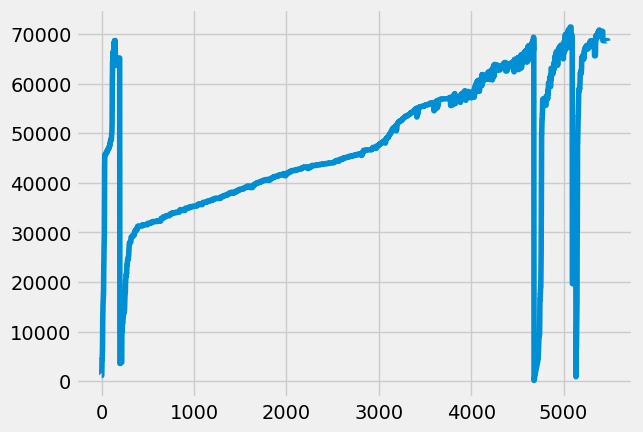

In [ ]:
df['Force'].plot()

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real failure')
    plt.plot(predicted, color='blue',label='Predicted failure')
    plt.title('failure Prediction')
    plt.xlabel('hits')
    plt.ylabel('failure')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Checking for missing values
training_set = df["Force"][:5140].values
test_set = df["Force"][5140:].values

In [ ]:
training_set

array([1127.513, 1127.513, 2352.635, ..., 5401.023, 6374.057, 6574.408])

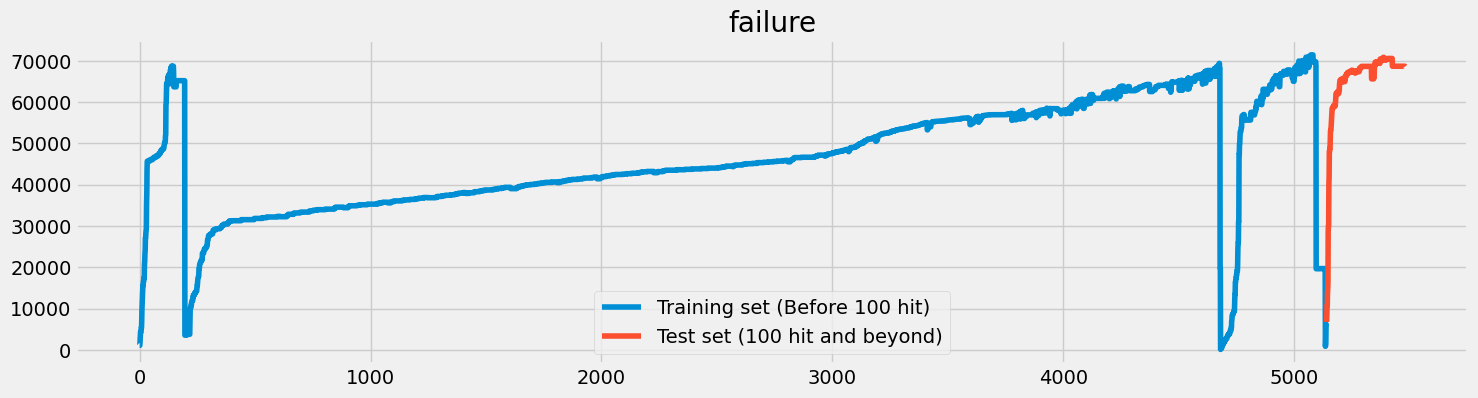

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
df["Force"][:5140].plot(figsize=(16,4),legend=True)
df["Force"][5140:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 100 hit)','Test set (100 hit and beyond)'])
plt.title('failure')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set.reshape(-1, 1))

In [ ]:
training_set.reshape(-1, 1)

array([[1127.513],
       [1127.513],
       [2352.635],
       ...,
       [5401.023],
       [6374.057],
       [6574.408]])

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(50,5140):
    X_train.append(training_set_scaled[i-50:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(50,5140):
    X_train.append(training_set[i-50:i])
    y_train.append(training_set[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
 #Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
160/160 [==============================] - 11s 12ms/step - loss: 2323599616.0000
Epoch 2/50
160/160 [==============================] - 2s 12ms/step - loss: 2322804736.0000
Epoch 3/50
160/160 [==============================] - 2s 12ms/step - loss: 2322048256.0000
Epoch 4/50
160/160 [==============================] - 2s 12ms/step - loss: 2321296640.0000
Epoch 5/50
160/160 [==============================] - 2s 14ms/step - loss: 2320543488.0000
Epoch 6/50
160/160 [==============================] - 2s 15ms/step - loss: 2319799808.0000
Epoch 7/50
160/160 [==============================] - 2s 12ms/step - loss: 2319054080.0000
Epoch 8/50
160/160 [==============================] - 2s 12ms/step - loss: 2318287360.0000
Epoch 9/50
160/160 [==============================] - 2s 12ms/step - loss: 2317544448.0000
Epoch 10/50
160/160 [==============================] - 2s 12ms/step - loss: 2316798720.0000
Epoch 11/50
160/160 [==============================] - 2s 12ms/step - loss: 2316041728.0

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((df["Force"][:5140],df["Force"][5141:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 50:].values
inputs = inputs.reshape(-1,1)
#inputs  = sc.transform(inputs)

In [ ]:
test_set

array([ 6776.094,  8227.063, 10603.35 , 10603.35 , 13826.21 , 14629.48 ,
       16438.15 , 28730.3  , 30065.2  , 30065.2  , 39889.27 , 42016.29 ,
       48028.07 , 48028.07 , 48804.78 , 48804.78 , 50930.8  , 52944.58 ,
       53317.8  , 53317.8  , 54248.75 , 55528.43 , 56183.21 , 57374.94 ,
       58481.36 , 58481.36 , 58481.36 , 58481.36 , 58784.74 , 58784.74 ,
       59055.36 , 59191.72 , 58980.64 , 58907.91 , 58944.53 , 58944.53 ,
       58944.53 , 59332.74 , 59332.74 , 60408.39 , 61786.98 , 62090.52 ,
       62090.52 , 62035.77 , 62035.77 , 62329.12 , 62329.12 , 62493.16 ,
       62500.98 , 62544.33 , 62544.33 , 62677.04 , 62039.09 , 62696.89 ,
       62808.99 , 62903.47 , 64238.79 , 64866.23 , 65246.82 , 65246.82 ,
       65246.82 , 65456.76 , 65456.76 , 65048.84 , 65173.96 , 65173.96 ,
       65173.96 , 64827.78 , 64827.78 , 65725.98 , 65725.98 , 65725.98 ,
       65725.98 , 65725.98 , 65725.98 , 65783.2  , 65783.2  , 65783.2  ,
       64949.46 , 64949.46 , 65869.62 , 65869.62 , 

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(50,391):
    X_test.append(inputs[i-50:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

11/11 [==============================] - 0s 7ms/step


In [ ]:
predicted_stock_price

array([[413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.8016],
       [413.

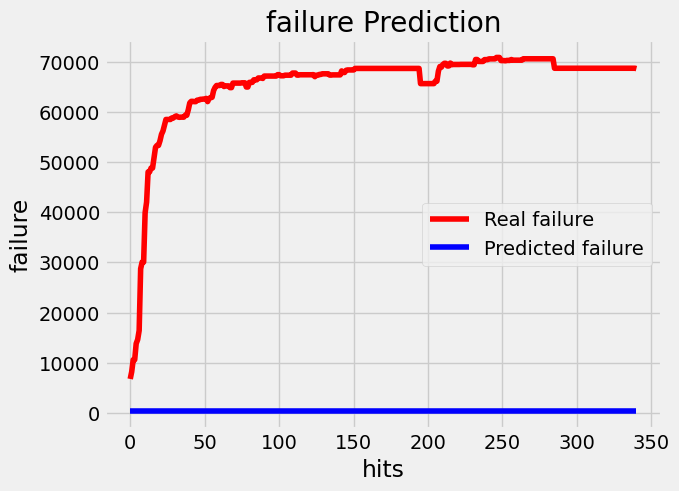

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 1235.0146088465324.


In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
133/133 [==============================] - 7s 13ms/step - loss: 0.0224
Epoch 2/50
133/133 [==============================] - 2s 15ms/step - loss: 0.0035
Epoch 3/50
133/133 [==============================] - 2s 15ms/step - loss: 0.0027
Epoch 4/50
133/133 [==============================] - 2s 12ms/step - loss: 0.0022
Epoch 5/50
133/133 [==============================] - 1s 11ms/step - loss: 0.0022
Epoch 6/50
133/133 [==============================] - 2s 11ms/step - loss: 0.0017
Epoch 7/50
133/133 [==============================] - 2s 12ms/step - loss: 0.0015
Epoch 8/50
133/133 [==============================] - 2s 12ms/step - loss: 0.0014
Epoch 9/50
133/133 [==============================] - 2s 12ms/step - loss: 0.0013
Epoch 10/50
133/133 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 11/50
133/133 [==============================] - 2s 15ms/step - loss: 0.0012
Epoch 12/50
133/133 [==============================] - 2s 12ms/step - loss: 9.9501e-04
Epoch 13/

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(50,2846):
    X_test.append(inputs[i-50:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

88/88 [==============================] - 1s 5ms/step


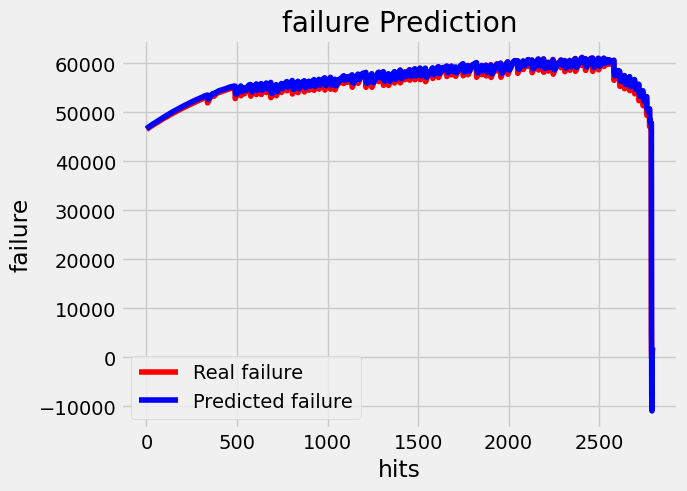

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 993.3569699745781.


# **Multivriate**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
df = pd.read_csv('/content/test2_all_synchro_AE.csv')

In [ ]:
df_test3 = pd.read_csv('/content/test3_DIC+Frame.csv')

In [ ]:
df_test3_1=df_test3.dropna()

In [ ]:
df

,set_id,time,channel,param_id,amplitude,duration,energy,rms,rise_time,counts,...,Cumulative_count_smooth,Cumulative_energy_smooth,Tstress,Peak frequency,Tstrain,Stroke from DIC (mm),Force,Stroke,Stress,Strain
0,14,11.040707,1,8,0.000233,2.718000e-04,112.955078,0.000064,2.700000e-06,18,...,NaN,NaN,5.15,593.607306,-0.000021,-0.009290,1127.513,0.051944,5.149402,0.000346
1,15,11.929389,1,8,0.000106,9.000000e-07,23.840845,0.000515,1.000000e-07,1,...,NaN,NaN,5.15,530.805687,-0.000021,-0.009290,1127.513,0.051944,5.149402,0.000346
2,16,12.167480,1,8,0.000202,8.656000e-04,226.100244,0.000051,2.010000e-05,43,...,NaN,NaN,10.80,593.157308,0.000015,0.000244,2352.635,0.101956,10.744588,0.000680
3,17,13.389931,1,8,0.000105,1.000000e-07,14.967017,0.001223,1.000000e-07,1,...,NaN,NaN,15.70,604.186489,0.000087,0.029238,3427.315,0.151950,15.652699,0.001013
4,18,14.029659,1,8,0.000186,5.585000e-04,151.914893,0.000052,1.190000e-05,24,...,49.8,304.057686,20.20,607.598231,0.000168,0.054609,4408.630,0.201950,20.134408,0.001346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,343,706.380507,1,8,0.000108,1.280000e-05,8.460547,0.000081,9.000000e-07,1,...,12888.8,346824.503203,367.00,592.459605,0.197853,55.133350,65188.840,34.801960,297.720314,0.232013
192,344,706.381727,2,9,0.002037,1.896000e-04,2961.631372,0.000395,5.610000e-05,72,...,12923.8,347800.708223,367.00,590.590591,0.197853,55.133350,65188.840,34.801960,297.720314,0.232013
193,345,706.384575,2,9,0.000136,1.030000e-05,11.225146,0.000104,1.010000e-05,1,...,12949.0,348528.123149,367.00,172.413793,0.197853,55.133350,65188.840,34.801960,297.720314,0.232013
194,346,706.386649,2,9,0.000666,9.320000e-05,269.693506,0.000170,1.110000e-05,35,...,12975.4,349247.463008,367.00,148.416887,0.197853,55.133350,65188.840,34.801960,297.720314,0.232013


In [ ]:
df1=df[['time','amplitude','duration','rms','rise_time','counts','Force']]

In [ ]:
df1

,time,amplitude,duration,rms,rise_time,counts,Force
0,11.040707,0.000233,2.718000e-04,0.000064,2.700000e-06,18,1127.513
1,11.929389,0.000106,9.000000e-07,0.000515,1.000000e-07,1,1127.513
2,12.167480,0.000202,8.656000e-04,0.000051,2.010000e-05,43,2352.635
3,13.389931,0.000105,1.000000e-07,0.001223,1.000000e-07,1,3427.315
4,14.029659,0.000186,5.585000e-04,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...,...
191,706.380507,0.000108,1.280000e-05,0.000081,9.000000e-07,1,65188.840
192,706.381727,0.002037,1.896000e-04,0.000395,5.610000e-05,72,65188.840
193,706.384575,0.000136,1.030000e-05,0.000104,1.010000e-05,1,65188.840
194,706.386649,0.000666,9.320000e-05,0.000170,1.110000e-05,35,65188.840


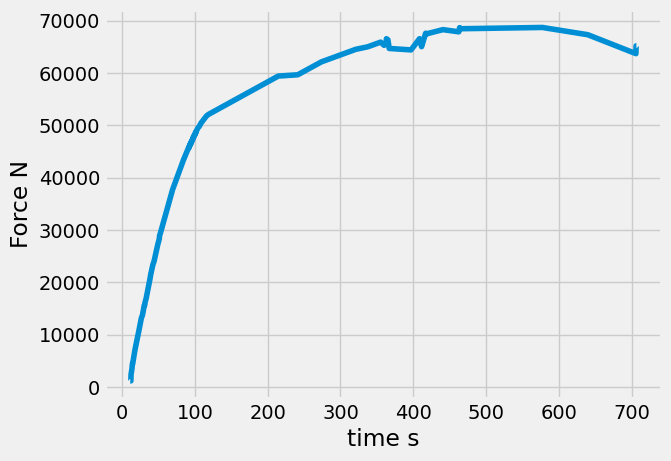

In [ ]:
import seaborn as sns

sns.lineplot(x=df1['time'], y= df1['Force'])
plt.xlabel('time s')
plt.ylabel('Force N')

# Show the plot
plt.show()

In [ ]:
df_final=pd.concat([df4,df_test3_2,df4,df4,df_test3_2,df4,df_test3_2,df_test3_2], axis=0)

In [ ]:
df_final=df_final.reset_index(drop=True)

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real failure')
    plt.plot(predicted, color='blue',label='Predicted failure')
    plt.title('failure Prediction')
    plt.xlabel('hits')
    plt.ylabel('failure')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Checking for missing values
training_set = df1[:150].iloc[:,1:7].values
test_set = df1[150:].iloc[:,1:7].values

In [ ]:
training_set.shape

(150, 6)

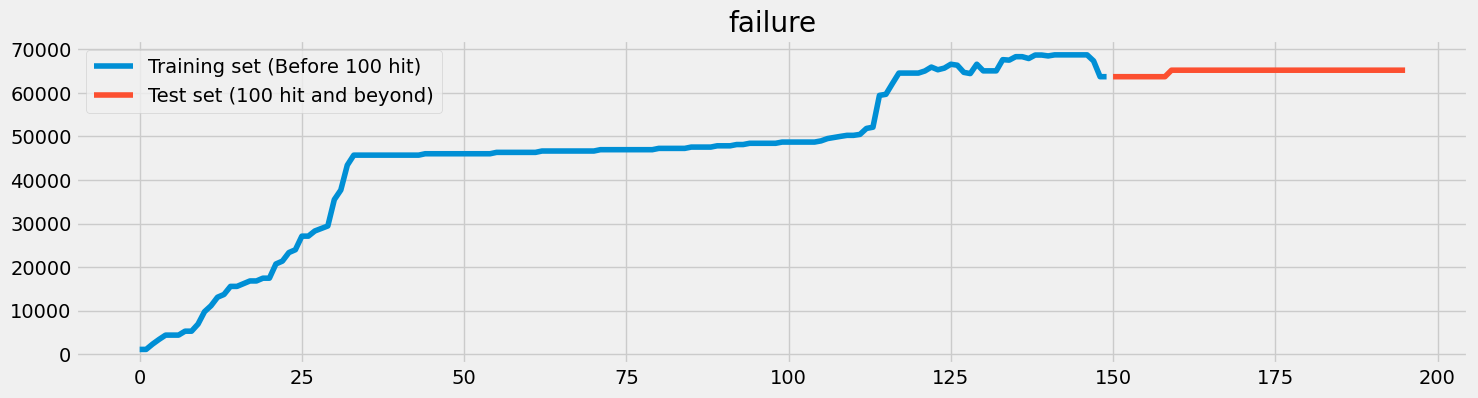

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
df1["Force"][:150].plot(figsize=(16,4),legend=True)
df1["Force"][150:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 100 hit)','Test set (100 hit and beyond)'])
plt.title('failure')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(50,150):
    X_train.append(training_set_scaled[i-50:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
 #Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(100, 50, 1)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
4/4 [==============================] - 6s 17ms/step - loss: 0.0114
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0100
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0102
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0102
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0100
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 10/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0101
Epoch 11/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 12/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0100
Epoch 13/50
4/4 [==============================] - 0s 17ms/st

In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((df1["Force"][:150],df1["Force"][151:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 50:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

ValueError: X has 1 features, but MinMaxScaler is expecting 6 features as input.

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(50,2846):
    X_test.append(inputs[i-50:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/test2_all_synchro_AE.csv')

In [ ]:
df1=df[['time','amplitude','duration','rms','rise_time','counts','Force']]

In [ ]:
#Separate dates for future plotting
train_dates = df1['time']
print(train_dates.tail(150)) #Check last few dates

46      92.083402
47      92.432444
48      92.432454
49      92.460551
50      92.517885
          ...    
191    706.380507
192    706.381727
193    706.384575
194    706.386649
195    706.654760
Name: time, Length: 150, dtype: float64


In [ ]:
#Variables for training
cols = list(df1)[1:7]
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['amplitude', 'duration', 'rms', 'rise_time', 'counts', 'Force']


In [ ]:
df_for_training = df1[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


In [ ]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (182, 14, 6).
trainY shape == (182, 1).


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 64)            18176     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
11/11 [==============================] - 3s 74ms/step - loss: 1.1942 - val_loss: 0.0289
Epoch 2/5
11/11 [==============================] -

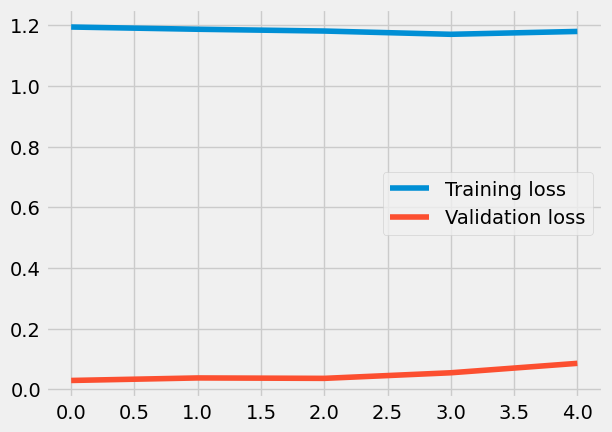

In [ ]:

#In my case, trainX has a shape (12809, 14, 5).
#12809 because we are looking back 14 days (12823 - 14 = 12809).
#Remember that we cannot look back 14 days until we get to the 15th day.
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but
#it needs multiple variables (5 in my example) to make this prediction.
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have.
#We need to predict all variables if we want to do that.

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future=90

In [ ]:
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future).tolist()


In [ ]:
forecast = model.predict(trainX[-n_future:])

3/3 [==============================] - 0s 8ms/step


In [ ]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

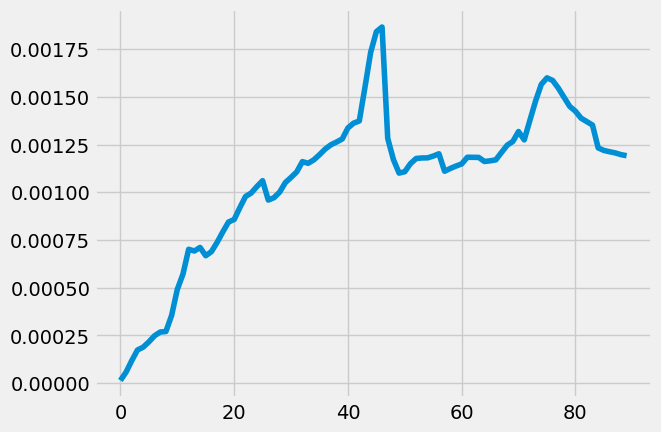

In [ ]:
plt.plot(y_pred_future)

<Axes: xlabel='time', ylabel='Force'>

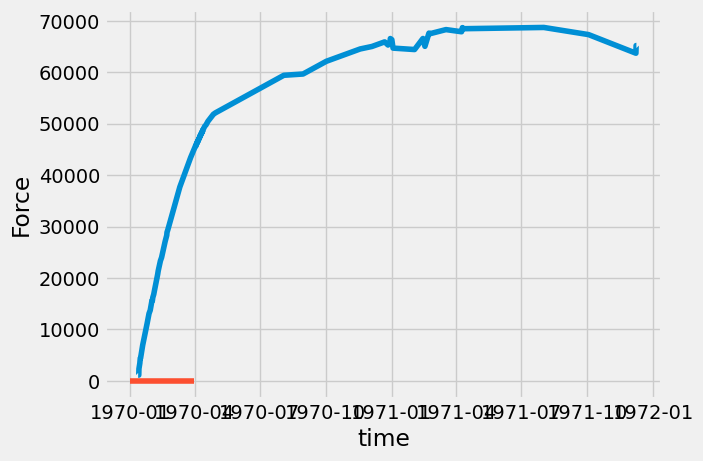

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'time':np.array(forecast_dates), 'Force':y_pred_future})
#df_forecast['time']=pd.to_datetime(df_forecast['time'])


original = df1[['time', 'Force']]
#original['time']=pd.to_datetime(original['time'])
#original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(x=original['time'], y=original['Force'])
sns.lineplot(x=df_forecast['time'], y=df_forecast['Force'])

In [ ]:



import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

#Read the csv file
df = pd.read_csv('data/GE.csv')
print(df.head()) #7 columns, including the Date.

#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates.

#Variables for training
cols = list(df)[1:6]
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training).

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#In my case, trainX has a shape (12809, 14, 5).
#12809 because we are looking back 14 days (12823 - 14 = 12809).
#Remember that we cannot look back 14 days until we get to the 15th day.
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but
#it needs multiple variables (5 in my example) to make this prediction.
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have.
#We need to predict all variables if we want to do that.

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

**Parsing the data**

**Plotting the temperature timeseries**

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

**Plotting the first 10 days of the temperature timeseries**

In [ ]:
plt.plot(range(1440), temperature[:1440])

**Computing the number of samples we'll use for each data split**

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

### Preparing the data

**Normalizing the data**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

**Instantiating datasets for training, validation, and testing**

In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

**Inspecting the output of one of our datasets**

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

### A common-sense, non-machine-learning baseline

**Computing the common-sense baseline MAE**

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

### Let's try a basic machine-learning model

**Training and evaluating a densely connected model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

**Plotting results**

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### Let's try a 1D convolutional model

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

### A first recurrent baseline

**A simple LSTM-based model**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

## Understanding recurrent neural networks

**NumPy implementation of a simple RNN**

In [ ]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

### A recurrent layer in Keras

**An RNN layer that can process sequences of any length**

In [ ]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

**An RNN layer that returns only its last output step**

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

**An RNN layer that returns its full output sequence**

In [ ]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

**Stacking RNN layers**

In [ ]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## Advanced use of recurrent neural networks

### Using recurrent dropout to fight overfitting

**Training and evaluating a dropout-regularized LSTM**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

In [ ]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### Stacking recurrent layers

**Training and evaluating a dropout-regularized, stacked GRU model**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

### Using bidirectional RNNs

**Training and evaluating a bidirectional LSTM**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

### Going even further

## Summary